The purpose of this notebook is to make a quick, cheap plot for visualizing the calibration datasets in order to discover when, during the studied period, data exist.

In [187]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [152]:
data_dir = os.path.join('..', '..', 'data', 'raw_data')
assert(data_dir)

In [153]:
os.listdir(data_dir)

['flowmeter_gage1.csv', 'flowmeter_gage2.csv', 'head', 'stage']

In [154]:
head_data_dir, stage_data_dir = os.path.join(data_dir, 'head'), os.path.join(data_dir, 'stage')

In [155]:
os.listdir(head_data_dir)

['B2-1.csv',
 'B2-2.csv',
 'B2-3.csv',
 'B35.csv',
 'B36.csv',
 'B37.csv',
 'KB1-1.csv',
 'KB1-2.csv',
 'KB4-3.csv',
 'KB4-4.csv',
 'NI1412-1.csv',
 'NI1412-3.csv',
 'NI15-O1.csv',
 'NI15-O44.csv',
 'NI15-O46.csv',
 'NI15-O47.csv',
 'NI15-O48.csv',
 'NI1501-3.csv',
 'NI1802-1.csv',
 'readme.md']

In [156]:
os.listdir(stage_data_dir)

['NI15-O1-STG.csv',
 'NI15-O44-STG.csv',
 'NI15-O46-STG.csv',
 'NI15-O47-STG.csv',
 'NI15-O48-STG.csv',
 'readme.md']

In [157]:
stage_data, head_data = {}, {}

In [158]:
def append_dataframes(directory, dictionary):
    for i in os.listdir(directory):
        if 'csv' in i:
            dictionary[i.replace('.csv', '')] = pd.read_csv(os.path.join(directory, i))

In [159]:
append_dataframes(stage_data_dir, stage_data)
append_dataframes(head_data_dir, head_data)

In [160]:
stage_df, head_df = pd.concat(stage_data).reset_index(), pd.concat(head_data).reset_index()

In [161]:
for df in [stage_df, head_df]:
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.rename(columns={'level_0': 'site'}, inplace=True)

In [231]:
def plot_figure(df, value):
    plt.figure(figsize=(10, 6), dpi=150)
    for site in df['site'].unique():
        x = df.loc[df['site'] == site]['datetime']
        y = df.loc[df['site'] == site][value]
        plt.plot(x, y, label=site, alpha=0.75, linewidth=1)
    plt.legend()
    plt.title(f'Temporal distribution of {value} data', fontsize=14)
    plt.tight_layout()
    plt.savefig(f'{value}.png')

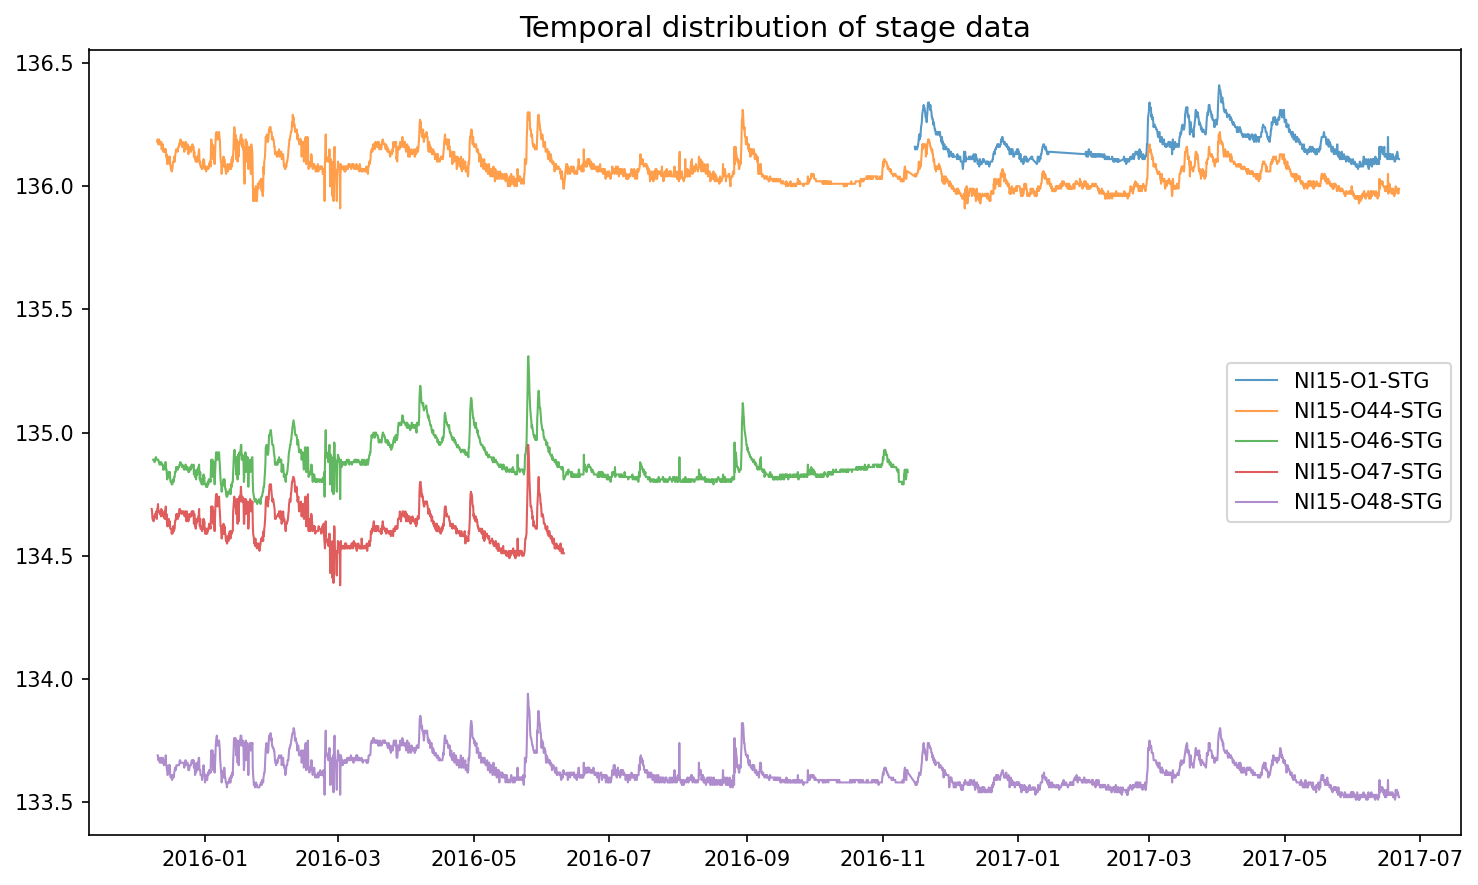

In [232]:
plot_figure(stage_df, 'stage')

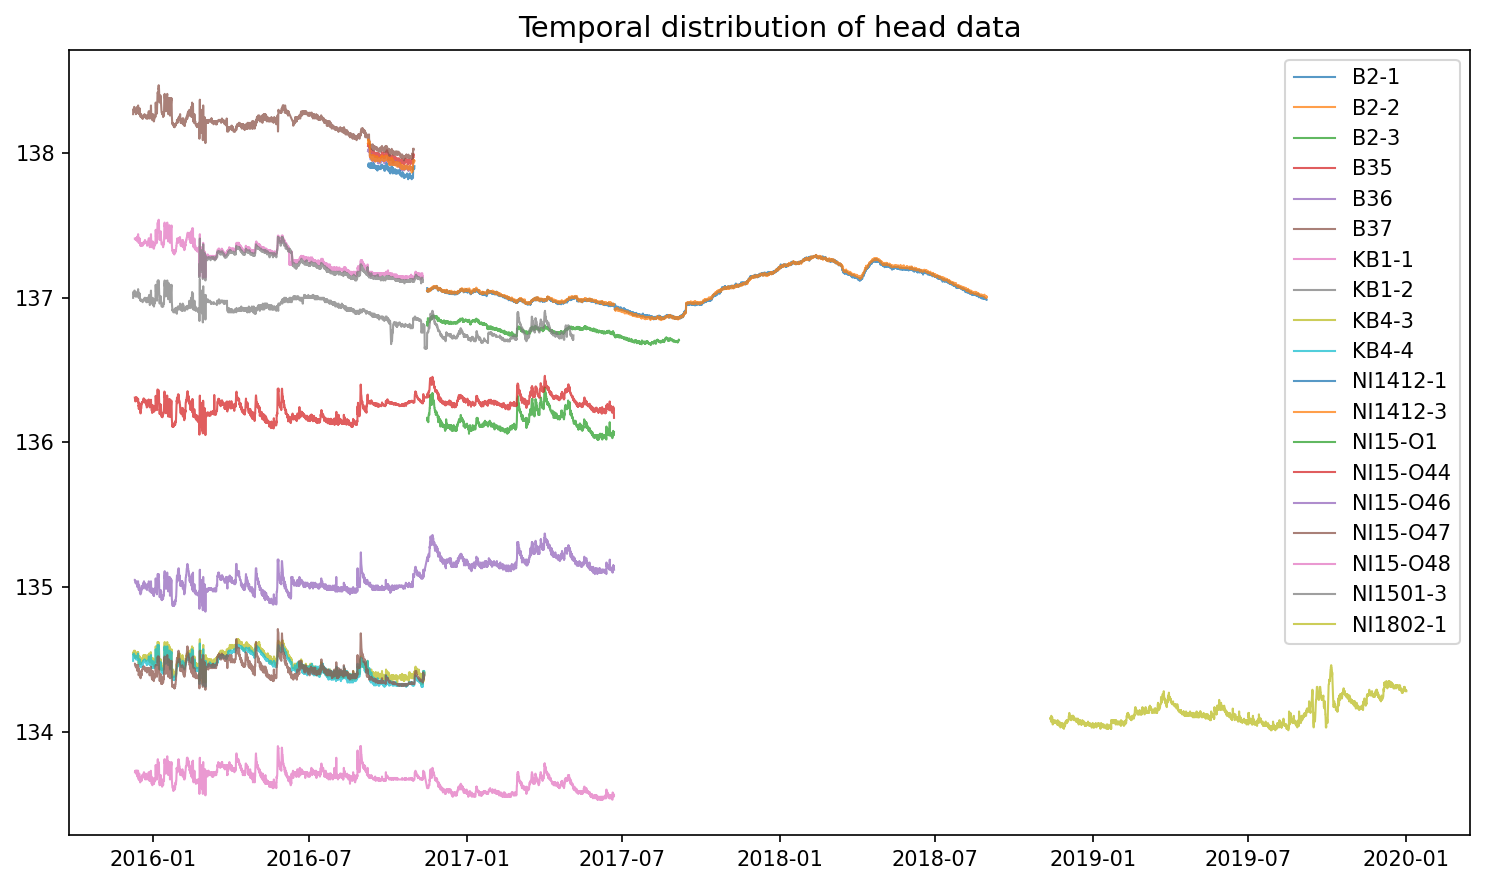

In [233]:
plot_figure(head_df, 'head')

Join all types of data:

In [234]:
alldata_df = pd.concat([stage_df, head_df])

In [235]:
alldata_df['calibration'] = alldata_df['stage'].fillna(alldata_df['head'])

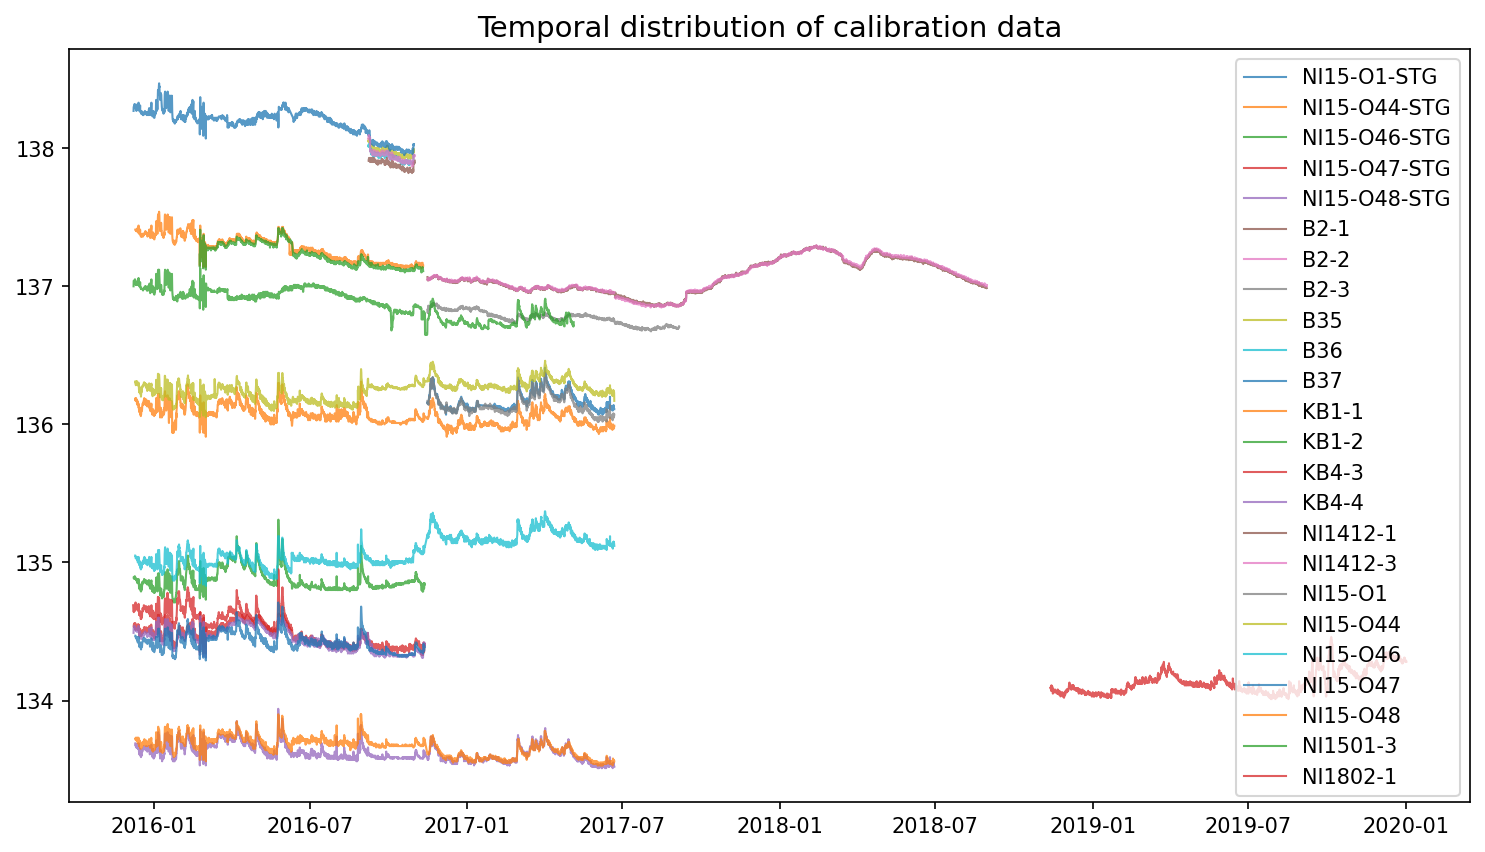

In [236]:
plot_figure(alldata_df, 'calibration')